In [39]:
NAME = "Labib ahmed Siddique "
ID = "18101478"
COLLABORATORS_ID = ["", ""]

# WALKTHROUGH
Watch [this](https://youtu.be/96Ssek9nLRs) how-to tutorial first

In [40]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [41]:
import numpy as np 
from skimage import io, color, exposure
import matplotlib.pyplot as plt 

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`. 

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [42]:
I = io.imread("sample.jpg") # Replace None with appropriate function call line


# find the height and the width of the image
(x,y,c)=(I.shape)
H = y # should contain height
W = x # should contain width
print("Height is", H)
print("Width is", W)

### BEGIN SOLUTION

### END SOLUTION

Height is 960
Width is 935


(-0.5, 959.5, 934.5, -0.5)

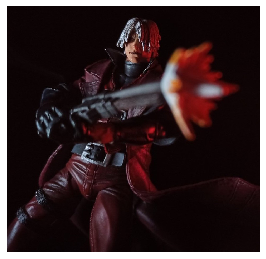

In [43]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I = I/255.0
io.imshow(I)
plt.axis("off")

### BEGIN SOLUTION

### END SOLUTION

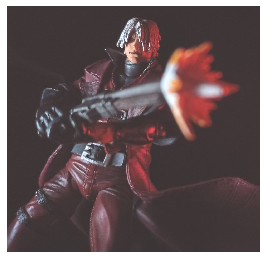

In [44]:
# Increase the brightness of the image without changing the contrast. 
# Save the resulting image in I_bright and display it.
I_bright = np.clip((I+0.2), 0,1)
io.imshow(I_bright)
plt.axis("off")
plt.show()
### BEGIN SOLUTION

### END SOLUTION

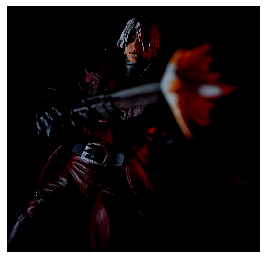

In [45]:
# Decrease the brightness of the image without changing the contrast. 
# Save the resulting image in I_dark and display it.
I_dark = np.clip((I-0.2), 0,1)
io.imshow(I_dark)
plt.axis("off")
plt.show()
### BEGIN SOLUTION

### END SOLUTION

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


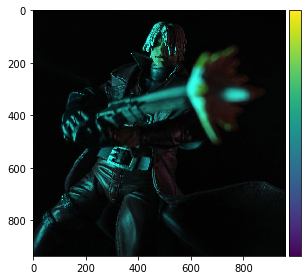

In [46]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3 
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift

I_tint = np.zeros(I.shape)
# HINT: 
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I_tint[:,:,0] = I[:,:,0]*0.3
I_tint[:,:,1] = I[:,:,1]*1.3
I_tint[:,:,2] = I[:,:,2]*1.1
io.imshow(I_tint)
plt.axis("off")
plt.show()
### END SOLUTION

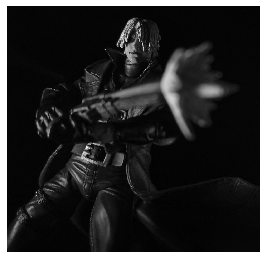

In [47]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)
io.imshow(I_gray)
plt.axis("off")
plt.show()

### BEGIN SOLUTION

### END SOLUTION

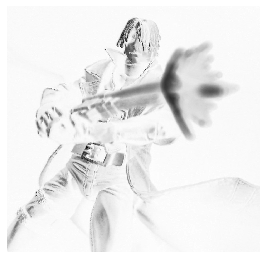

In [48]:
# Display the negative of the grayscale image
I_neg = 1-I_gray
io.imshow(I_neg)
plt.axis("off")
plt.show()


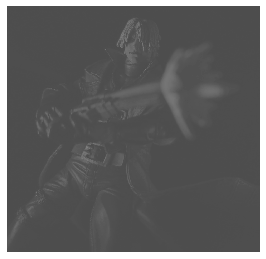

In [49]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded =  exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.5))

io.imshow(I_degraded)
plt.axis("off")
plt.show()
### BEGIN SOLUTION

### END SOLUTION

In [74]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3
# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1




#ref------- https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/



def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    pass 
    # Write your code here
    I_stretched= np.zeros(I.shape)
    
    x = (0 <= I) & (I <= r1)
    I_stretched[x] = (I[x])*((s1 / r1))
    

    y =(r1 <= I) & (I <= r2)
    I_stretched[y] = (I[y]-r1)*((s2 - s1)/(r2 - r1)) + s1
    

    z= (I > r2)
    I_stretched[z] = (I[z]-r2) * ((I[z] - s2)/(1 - r2))  + s2
          
    return I_stretched




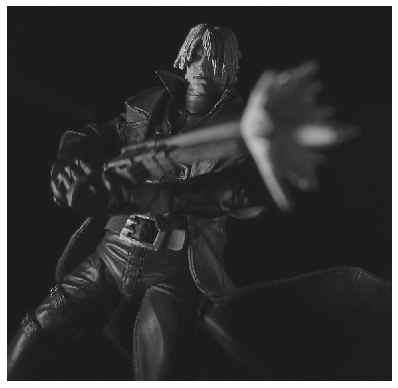

In [75]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.5
s1 = 0.1
s2 = 0.9
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

# Display the strtched image
io.imshow(I_stretched)
plt.axis("off")
plt.show()
### BEGIN SOLUTION

### END SOLUTION

# Task 2 - Histogram and Equalization

Text(0.5, 1.0, 'Blue')

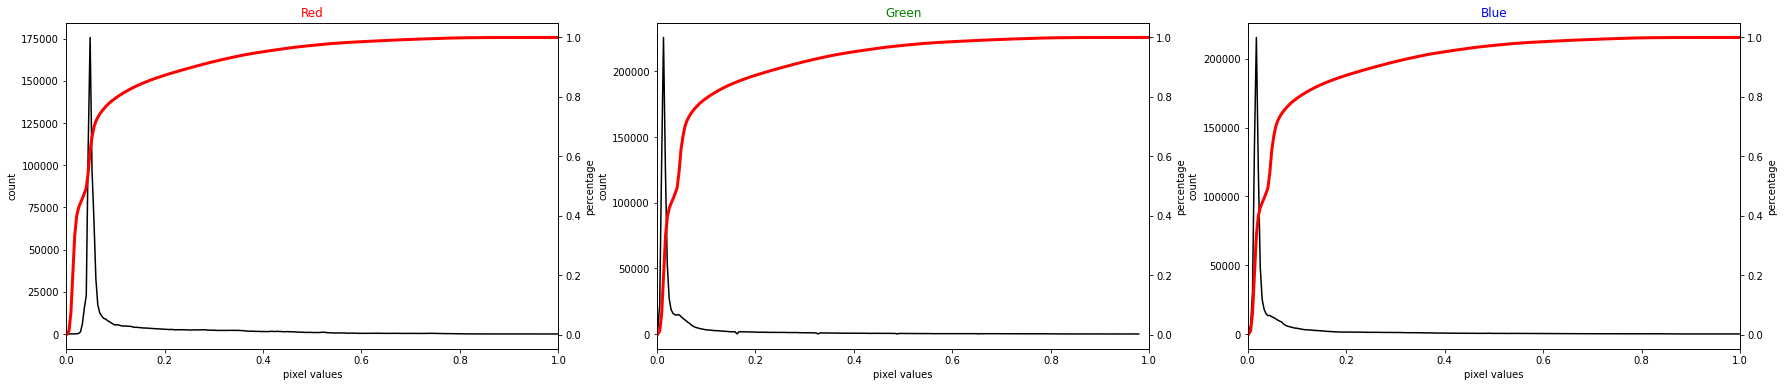

In [52]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
def plot_hist(I_gray, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I_gray.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I_gray.max() <= 1 else 255
    plt.xlim([0, xmax])
    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])
        
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

plt.rcParams['figure.figsize'] = (30, 6)
plt.subplot(1, 3, 1)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 3, 2)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 3, 3)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")
### END SOLUTION

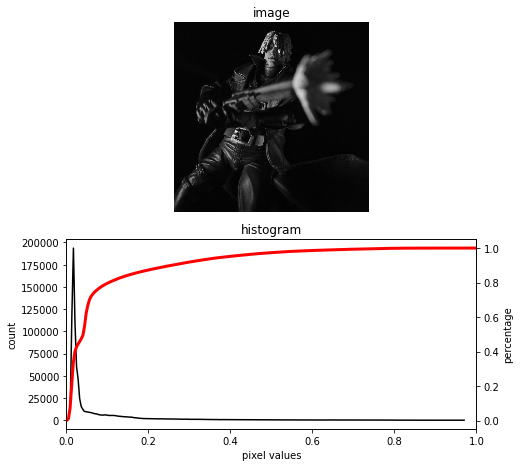

In [53]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION


def plot_img_and_hist(I_gray, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I_gray)
    plt.axis("off")
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plot_hist(I_gray, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_gray)
plt.show()    
### END SOLUTION

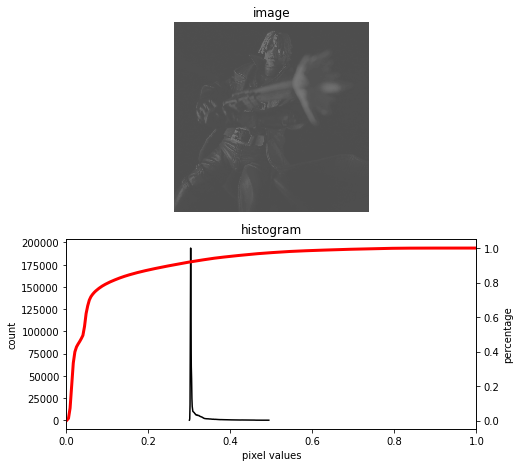

In [54]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plt.rcParams['figure.figsize']=(6,6)
plot_img_and_hist(I_degraded)
plt.show()    
### END SOLUTION

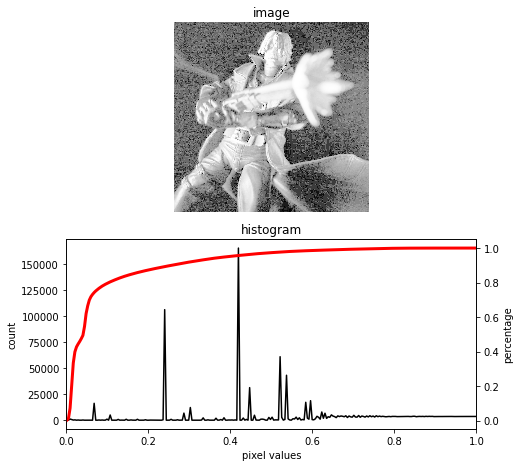

In [55]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = exposure.equalize_hist(I_degraded)
plot_img_and_hist(I_recon_gray)

### BEGIN SOLUTION

### END SOLUTION

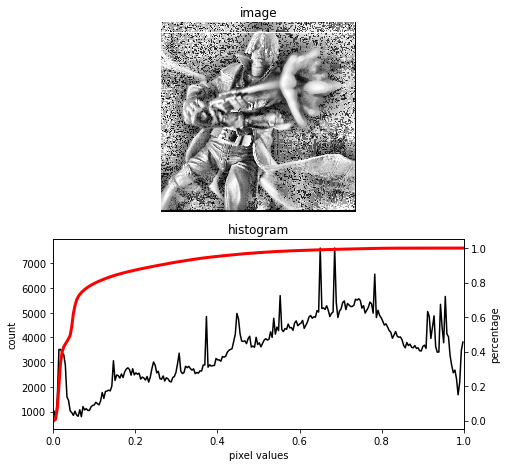

In [56]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 =exposure.equalize_adapthist(I_degraded, kernel_size=(110, 110), clip_limit=0)
plot_img_and_hist(I_recon_gray_2)
### BEGIN SOLUTION

### END SOLUTION

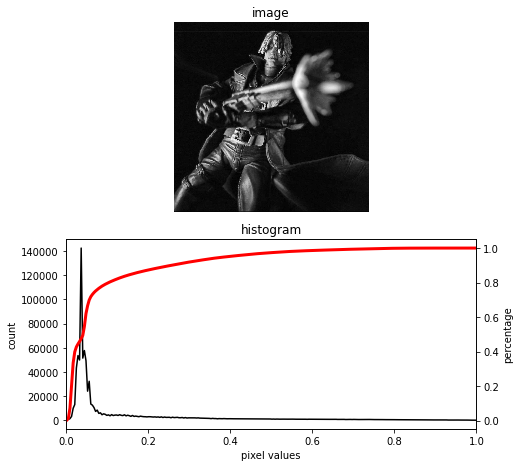

In [57]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 =exposure.equalize_adapthist(I_degraded, kernel_size=(100, 100), clip_limit=0.01)
plot_img_and_hist(I_recon_gray_3)
### BEGIN SOLUTION

### END SOLUTION

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


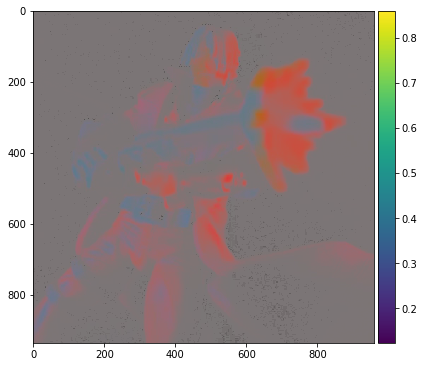

In [58]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space) 
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-4-demo-codes



### BEGIN SOLUTION
Ilab = color.rgb2lab(I)
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.3, 0.5))
Ilab[:, :, 0] = Idegraded_l*100
Idegraded = color.lab2rgb(Ilab)
I_rgb_degraded = Idegraded
io.imshow(Idegraded)
### END SOLUTION

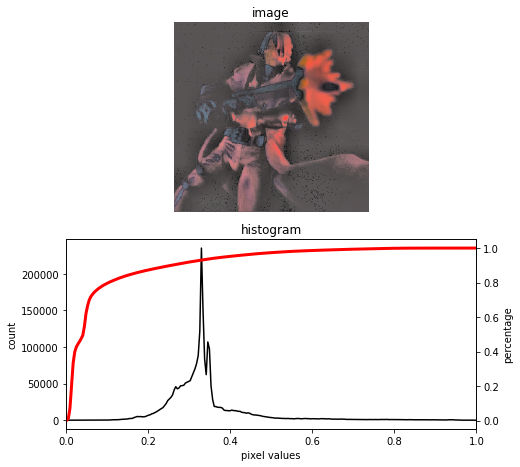

In [59]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I_recon_color = exposure.equalize_adapthist(I_rgb_degraded, kernel_size=(100, 100), clip_limit=0.01)
plot_img_and_hist(I_recon_color)
### BEGIN SOLUTION

### END SOLUTION

# Task 3 - Open Ended

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
#these lines are to unzip a file and save em to my drive
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/drive/MyDrive/asset-v1_buX+CSE428+2021_Fall+type@asset+block@challenge_images.zip').extractall('/content/drive/MyDrive/428 assignment')

  Using cached pyunpack-0.2.2-py2.py3-none-any.whl (3.8 kB)
  Using cached entrypoint2-0.2.4-py3-none-any.whl (6.2 kB)
  Using cached EasyProcess-0.3-py2.py3-none-any.whl (7.9 kB)


In [ ]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using 
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION

### END SOLUTION

#challenge 1

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


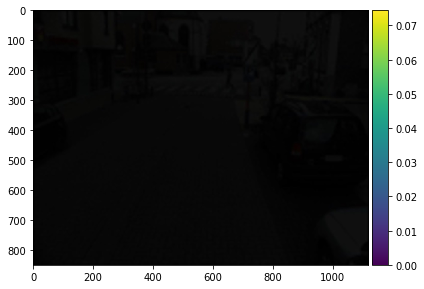

In [63]:
A = io.imread('/content/drive/MyDrive/428 assignment/challenge-1.jpg')
A = A/255.0
io.imshow(A)


(-0.5, 1117.5, 849.5, -0.5)

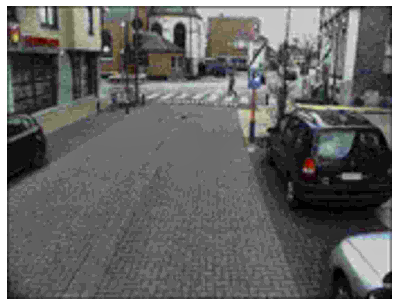

In [64]:
A_CLAHE = exposure.equalize_adapthist(A, kernel_size=(100, 100), clip_limit=0.01)
io.imshow(A_CLAHE)
plt.axis('off')
#plot_img_and_hist(A_CLAHE)

#challenge 2

(-0.5, 1124.5, 849.5, -0.5)

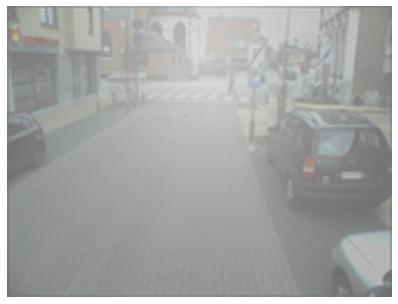

In [65]:
B = io.imread('/content/drive/MyDrive/428 assignment/challenge-2.jpg')
B = B/255.0
io.imshow(B)
plt.axis("off")

In [76]:
def piecewise_contrast_stretc2(B, r1, r2, s1, s2):
    pass 
    #(yes definately a lazy copypasta :3 )
    I_stretched= np.zeros(B.shape)
    
    x = (0 <= B) & (B <= r1)
    I_stretched[x] = (B[x])*((s1 / r1))
    

    y =(r1 <= B) & (B <= r2)
    I_stretched[y] = (B[y]-r1)*((s2 - s1)/(r2 - r1)) + s1
    

    z= (B > r2)
    I_stretched[z] = (B[z]-r2) * ((B[z] - s2)/(1 - r2))  + s2
          
    return I_stretched


/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


(-0.5, 1124.5, 849.5, -0.5)

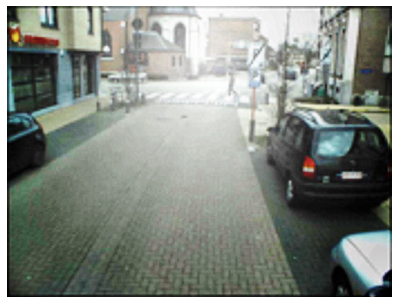

In [86]:
r1 = 0.6
r2 = 0.7
s1 = 0.5
s2 = 0.9


B_recon = exposure.equalize_hist(B)
B_CLAHE = exposure.equalize_adapthist(B_recon, kernel_size=(100, 100), clip_limit=0.01)
B_stretch = piecewise_contrast_stretc2(B_CLAHE, r1, r2, s1, s2)

io.imshow(B_CLAHE)
plt.axis("off")

#chellenge 3

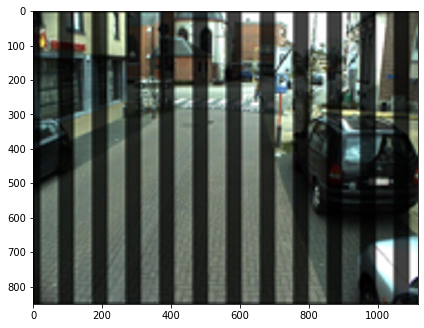

In [89]:
C = io.imread('/content/drive/MyDrive/428 assignment/challenge-3.jpg')
C= C/255.0
io.imshow(C)


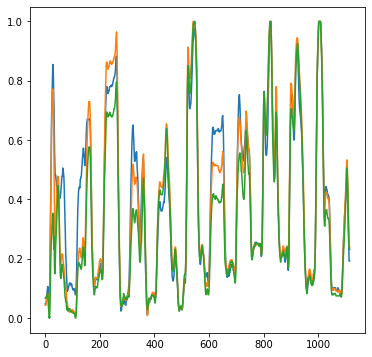

In [90]:
plt.plot(C[100, :])

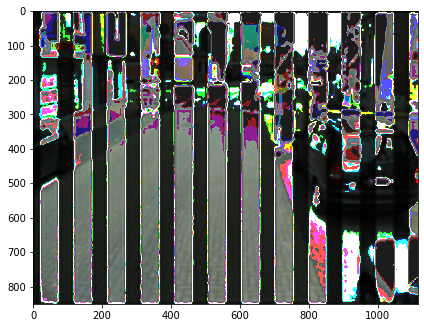

In [123]:

x = 0.2
y = 0.3
C[(C >= x) & (C <= y)] =1
io.imshow(C)


# Challenge 4


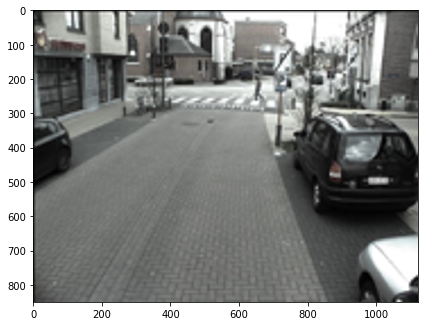

In [101]:
D = io.imread('/content/drive/MyDrive/428 assignment/challenge-4.jpg')
D= D/255.0
io.imshow(D)




In [112]:
D.shape

(850, 1121, 3)

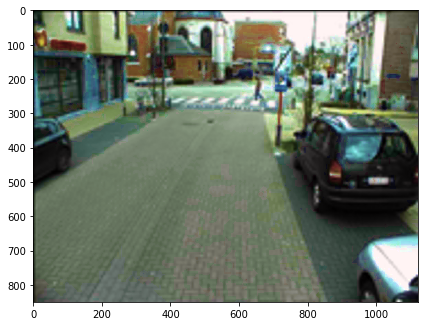

In [120]:

hsv_image = color.rgb2hsv(D)
hsv_image[:, :, 1] = exposure.equalize_adapthist(hsv_image[:, :, 1] ,kernel_size=(600, 600), clip_limit=0.04)
X= color.hsv2rgb(hsv_image)

io.imshow(X)